C:\Users\Robby1206\AppData\Local\Temp\ipykernel_12096\1872621498.py:60: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Robby1206\AppData\Local\Temp\ipykernel_12096\1872621498.py:60: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Robby1206\AppData\Local\Temp\ipykernel_12096\1872621498.py:60: UserWarning: Glyph 38364 (\N{CJK UNIFIED IDEOGRAPH-95DC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Robby1206\AppData\Local\Temp\ipykernel_12096\1872621498.py:60: UserWarning: Glyph 37749 (\N{CJK UNIFIED IDEOGRAPH-9375}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Robby1206\AppData\Local\Temp\ipykernel_12096\1872621498.py:60: UserWarning: Glyph 23383 (\N{CJK UNIFIED IDEOGRAPH-5B57}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Robby1206\AppData\Local\Temp\ipykernel_12096\1872621498.py:60: Use

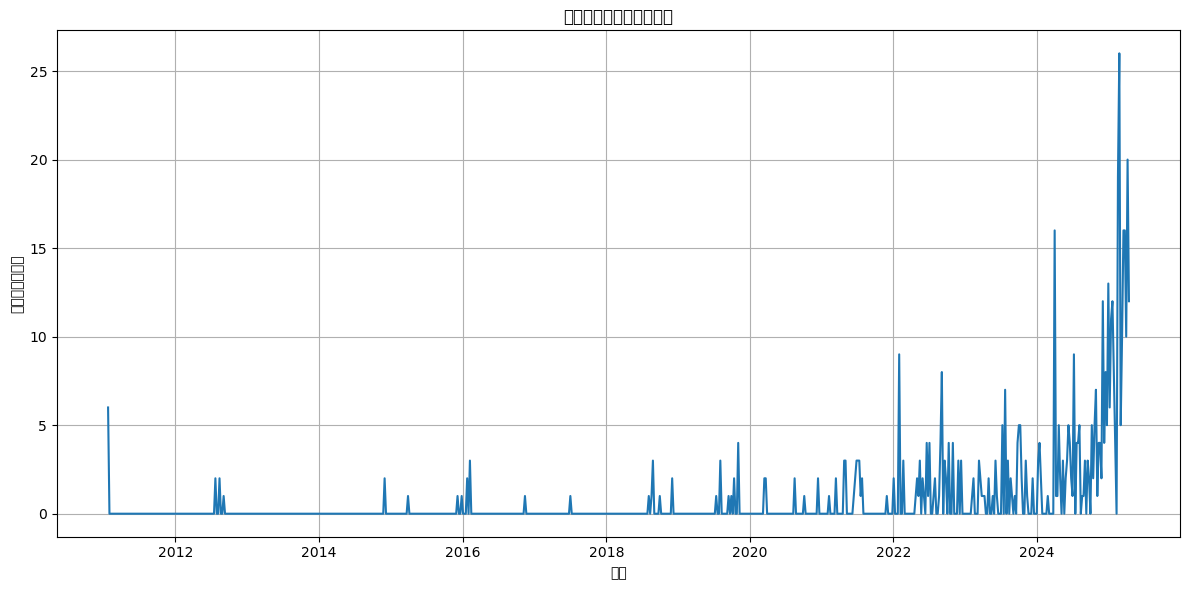

In [2]:
# 環境重置後需重新載入資料
import pandas as pd

# 環境重置導致先前上傳的詐騙關鍵字檔案遺失，我們將先重新上傳關鍵字內容

# 暫時用簡單詐騙關鍵字列表來模擬分析
scam_keywords = [
    "立刻", "即刻", "投資", "加入會員", "ATM", "匯款", "有誤", "快", "高薪", "限時優惠",
    "解除設定", "帳戶", "保證金", "代辦", "現金卡", "LINE 群組"
]

# 重新執行其他部分
ptt = pd.read_csv("ptt_語料_處理後.csv")
mobile = pd.read_csv("mobile01_處理後.csv")
finfo = pd.read_csv("finfo_posts_產險_壽險_投資型.csv")

for df in [ptt, mobile, finfo]:
    df.columns = df.columns.str.strip()

ptt["來源"] = "ptt"
mobile["來源"] = "mobile01"
finfo["來源"] = "finfo"
combined = pd.concat([ptt, mobile, finfo], ignore_index=True)

# 合併內容欄位
def extract_text(row):
    text = ''
    for col in ['發文內容', '留言內容', 'content']:
        if col in row and pd.notna(row[col]):
            text += str(row[col]) + ' '
    return text.strip()

combined["完整內容"] = combined.apply(extract_text, axis=1)

# 偵測詐騙關鍵字數量
def scam_count(text):
    return sum(1 for k in scam_keywords if k in text)

combined["詐騙關鍵字次數"] = combined["完整內容"].apply(scam_count)

# 日期欄推測與處理
possible_date_cols = ["日期", "時間", "發文時間", "資料抓取日", "publish_time"]
date_col = next((col for col in combined.columns if col in possible_date_cols), None)
combined[date_col] = pd.to_datetime(combined[date_col], errors='coerce')
combined = combined.dropna(subset=[date_col])
combined.set_index(date_col, inplace=True)

# 統計時間序列
weekly_scam = combined["詐騙關鍵字次數"].resample("W").sum()

# 繪圖
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(weekly_scam.index, weekly_scam.values)
plt.title("每週詐騙關鍵字出現次數")
plt.xlabel("日期")
plt.ylabel("關鍵字出現次數")
plt.grid(True)
plt.tight_layout()
plt.show()
